In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('test_agriculture.csv',sep='\t' )
df.head(5)


,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


# EDA for Test Data

In [3]:
df.shape #checking the rows and ccolumns count

(1194, 9)

In [4]:
df.columns #checking various columns 

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season'],
      dtype='object')

In [5]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
count,1194.000000,1194.000000,1194.000000,1194.000000,1194.000000,1076.000000,1194.000000,1194.000000
mean,1289.259631,0.195142,0.453099,2.385260,26.561977,29.041822,7.033501,1.881910
std,846.731347,0.396476,0.498004,0.523369,16.166877,12.793716,8.861260,0.684121
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,677.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000
50%,1056.000000,0.000000,0.000000,2.000000,20.000000,28.000000,2.000000,2.000000
75%,1785.000000,0.000000,1.000000,3.000000,40.000000,38.000000,13.000000,2.000000
max,4097.000000,1.000000,1.000000,3.000000,90.000000,64.000000,42.000000,3.000000


key observations here

1. mean and median are not very near in all columns
2. There is huge differnece in 75% and max values in few columns. means few outliers are there
3. Count is same in all columns other than Number_Weeks_Used. means missing values in this column 

In [6]:
df.dtypes  # checking the data types of columns 

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
dtype: object

In [7]:
df.isnull().sum() # checking for null values 

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          118
Number_Weeks_Quit            0
Season                       0
dtype: int64

<AxesSubplot:>

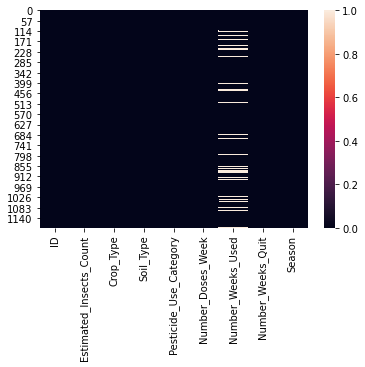

In [8]:
sns.heatmap(df.isnull())

There are null values in column  Number_Weeks_Used  

In [9]:
dfcor=df.corr()
dfcor

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
Estimated_Insects_Count,1.000000,0.020481,-0.339709,0.037850,-0.121269,0.521670,0.147096,0.023366
Crop_Type,0.020481,1.000000,0.065497,0.481655,-0.170519,0.065631,-0.390998,0.020134
Soil_Type,-0.339709,0.065497,1.000000,0.133705,0.057779,-0.146737,-0.195289,-0.069168
Pesticide_Use_Category,0.037850,0.481655,0.133705,1.000000,-0.011245,0.430705,-0.584771,0.014799
Number_Doses_Week,-0.121269,-0.170519,0.057779,-0.011245,1.000000,0.130143,0.010722,0.026544
Number_Weeks_Used,0.521670,0.065631,-0.146737,0.430705,0.130143,1.000000,-0.379640,0.017526
Number_Weeks_Quit,0.147096,-0.390998,-0.195289,-0.584771,0.010722,-0.379640,1.000000,0.029690
Season,0.023366,0.020134,-0.069168,0.014799,0.026544,0.017526,0.029690,1.000000


<AxesSubplot:>

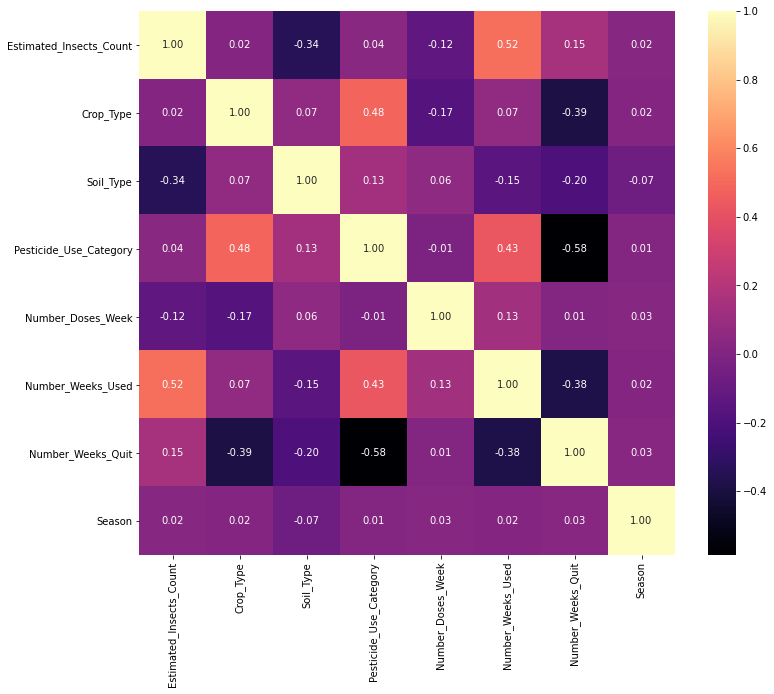

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')

key observations here
1. Estimated_Insects_Count, Pesticide_Use_Category are are highly correlated with Number_Weeks_Used 
2. Crop_type and Pesticide_Use_Category are highly correlated
3. Number_Weeks_Quit is negitively correlated with Pesticide_Use_Category

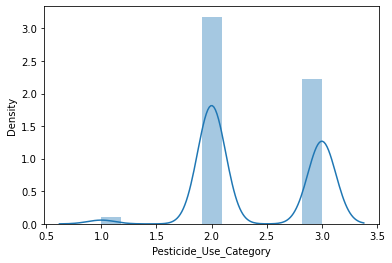

In [11]:
sns.distplot(df["Pesticide_Use_Category"])
plt.show()

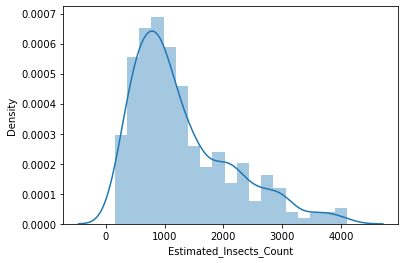

In [12]:
sns.distplot(df["Estimated_Insects_Count"])
plt.show()

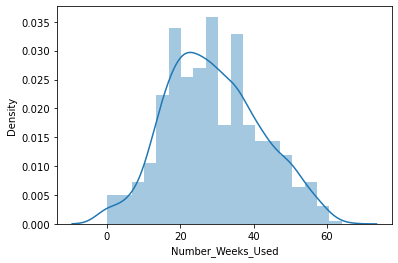

In [13]:
sns.distplot(df["Number_Weeks_Used"])
plt.show()

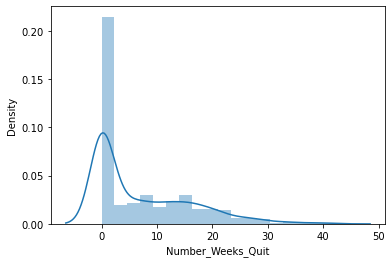

In [14]:
sns.distplot(df["Number_Weeks_Quit"])
plt.show()

Univariate analysis shows the data is not normalised.

Bivariate analysis not done as this dataset has no target variable

# Handling the null values
only this ccolumn has null values which is numerical . so changing the null with mean()

In [15]:
df['Number_Weeks_Used'] = df['Number_Weeks_Used'].fillna((df['Number_Weeks_Used'].mean()))

In [16]:
# changing the nominal value to integer for training model
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["ID"]=le.fit_transform(df["ID"])

In [17]:
df.head(5)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,0,188,1,1,1,0,29.041822,0,2
1,1,410,1,1,1,0,0.000000,0,2
2,2,626,1,0,1,0,0.000000,0,2
3,3,731,1,0,1,0,0.000000,0,2
4,4,789,0,0,1,0,0.000000,0,1


# Handling the outliers


<AxesSubplot:>

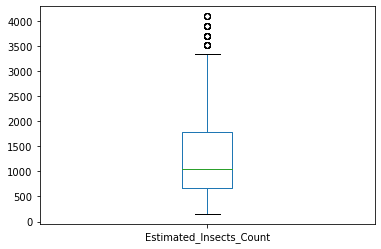

In [18]:
df["Estimated_Insects_Count"].plot.box()

<AxesSubplot:>

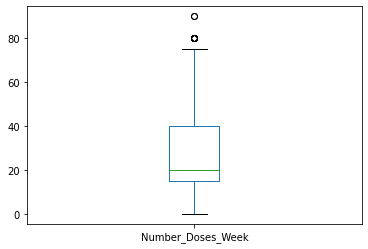

In [19]:
df["Number_Doses_Week"].plot.box()

<AxesSubplot:>

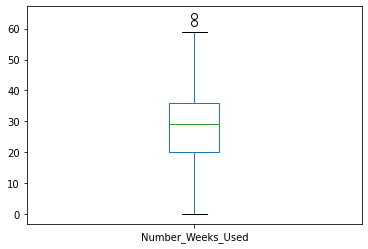

In [20]:
df["Number_Weeks_Used"].plot.box()

In [21]:
# few outliers are present. So removing them

In [22]:
from scipy.stats import zscore


In [23]:
z=np.abs(zscore(df))
z

array([[1.73060079, 1.30114598, 2.03087752, ..., 0.        , 0.79406857,
        0.17268872],
       [1.72769953, 1.03885142, 2.03087752, ..., 2.39235191, 0.79406857,
        0.17268872],
       [1.72479827, 0.78364591, 2.03087752, ..., 2.39235191, 0.79406857,
        0.17268872],
       ...,
       [1.72479827, 0.18580336, 0.49239798, ..., 0.49081149, 0.34247635,
        0.17268872],
       [1.72769953, 0.18580336, 0.49239798, ..., 1.23908655, 1.80258672,
        0.17268872],
       [1.73060079, 0.18580336, 0.49239798, ..., 0.        , 0.67360616,
        1.28965409]])

In [24]:
threshold=3
print(np.where(z>3))

(array([  50,   83,  129,  136,  179,  255,  280,  281,  282,  501,  502,
        503,  535,  574,  613,  630,  751,  775,  827,  829,  853,  868,
        870,  871,  883,  890,  895,  897,  902,  904,  910,  911,  912,
        913,  914,  915,  916, 1030]), array([5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 1, 1, 1, 1, 1, 1, 1, 5]))


In [25]:
df_new=df[(z<3).all(axis=1)]
df_new

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,0,188,1,1,1,0,29.041822,0,2
1,1,410,1,1,1,0,0.000000,0,2
2,2,626,1,0,1,0,0.000000,0,2
3,3,731,1,0,1,0,0.000000,0,2
4,4,789,0,0,1,0,0.000000,0,1
...,...,...,...,...,...,...,...,...,...
1189,1189,1132,0,1,2,40,20.000000,23,2
1190,1190,1132,0,1,2,40,25.000000,18,1
1191,1191,1132,0,1,2,40,35.000000,4,2
1192,1192,1132,0,1,2,60,14.000000,23,2


In [26]:
df_new.shape

(1156, 9)

In [27]:
df_new.skew() # shows little skewness . So removing it

ID                         0.020057
Estimated_Insects_Count    1.010894
Crop_Type                  1.510094
Soil_Type                  0.156386
Pesticide_Use_Category     0.063260
Number_Doses_Week          0.657597
Number_Weeks_Used          0.221900
Number_Weeks_Quit          1.037757
Season                     0.157502
dtype: float64

In [28]:
from sklearn.preprocessing import power_transform

In [29]:
df_new=power_transform(df_new,method='yeo-johnson')

In [30]:
# scaling the dataset

In [31]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
scaled_df=sc.fit_transform(df_new)
scaled_df.shape

(1156, 9)

# All EDA and preprocessing has been done on test dataset. After data modelling done on Train dataset we will use this test dataset for prediction in the end at the time of conclusion

# EDA for train dataset

In [32]:
ds=pd.read_csv("train_agriculture.csv",sep='\t')
ds.head(5)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [33]:
ds.dtypes # checking the data types of columns 

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [34]:
ds.columns #checking various columns 

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [35]:
ds.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4157.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,12.586005,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


key observations here

1. mean and median are not very near in all columns
2. There is huge differnece in 75% and max values in few columns. means few outliers are there
3. Count is same in all columns other than Number_Weeks_Used. means missing values in this column 

In [36]:
ds.shape  #checking the rows and ccolumns count

(4599, 10)

In [37]:
ds.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

<AxesSubplot:>

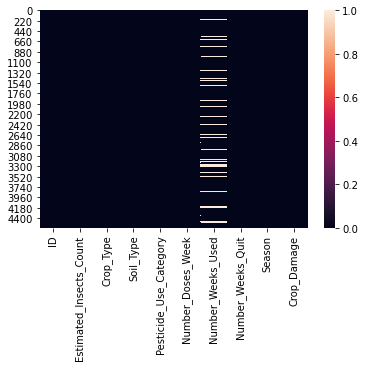

In [38]:
sns.heatmap(ds.isnull()) # checking the null values 

In [39]:
dscor=ds.corr() # checking the correlation
dscor

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.036911,-0.151796,-0.027111,-0.122509,0.449470,0.246719,-0.009482,0.202312
Crop_Type,-0.036911,1.000000,-0.175019,0.349662,-0.163832,-0.002237,-0.273475,-0.000549,0.021772
Soil_Type,-0.151796,-0.175019,1.000000,0.021661,0.050099,-0.098399,-0.034355,0.011052,-0.059481
Pesticide_Use_Category,-0.027111,0.349662,0.021661,1.000000,-0.005985,0.387982,-0.569467,0.008487,0.199195
Number_Doses_Week,-0.122509,-0.163832,0.050099,-0.005985,1.000000,0.104022,-0.032381,-0.003768,-0.018363
Number_Weeks_Used,0.449470,-0.002237,-0.098399,0.387982,0.104022,1.000000,-0.467386,-0.011108,0.244988
Number_Weeks_Quit,0.246719,-0.273475,-0.034355,-0.569467,-0.032381,-0.467386,1.000000,0.004861,-0.152918
Season,-0.009482,-0.000549,0.011052,0.008487,-0.003768,-0.011108,0.004861,1.000000,-0.016196
Crop_Damage,0.202312,0.021772,-0.059481,0.199195,-0.018363,0.244988,-0.152918,-0.016196,1.000000


<AxesSubplot:>

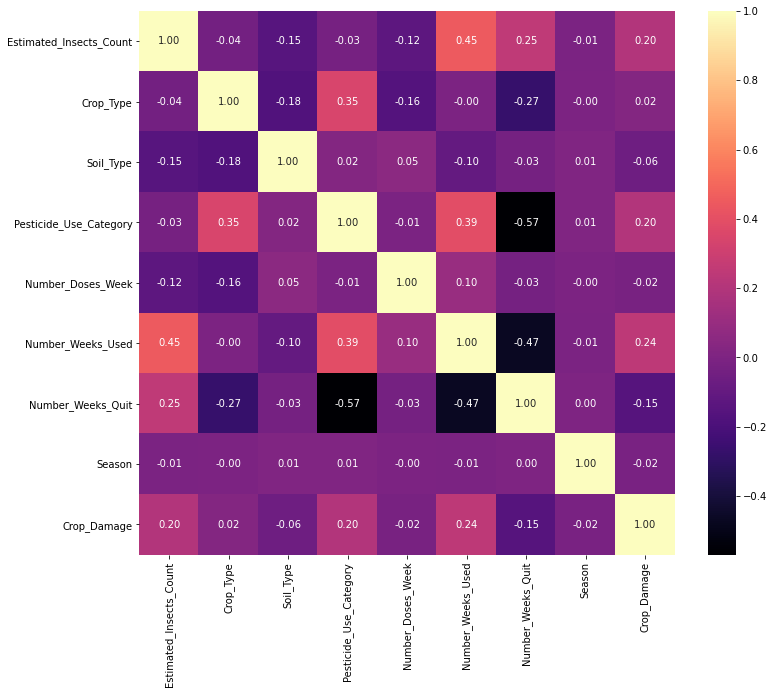

In [40]:
plt.figure(figsize=(12,10))
sns.heatmap(ds.corr(),annot=True,cmap="magma",fmt='.2f')

key observations here
1. Estimated_Insects_Count, Pesticide_Use_Category are are highly correlated with Number_Weeks_Used 
2. Crop_type and Pesticide_Use_Category are highly correlated
3. Number_Weeks_Quit is negitively correlated with Pesticide_Use_Category

In [41]:
#univariate analysis

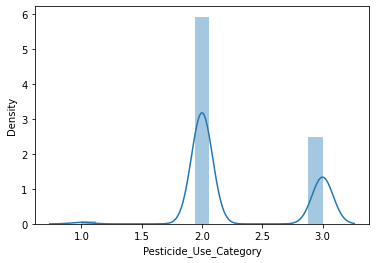

In [42]:
sns.distplot(ds["Pesticide_Use_Category"])
plt.show()

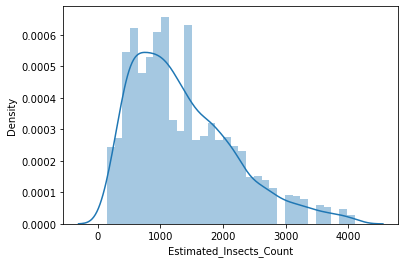

In [43]:
sns.distplot(ds["Estimated_Insects_Count"])
plt.show()

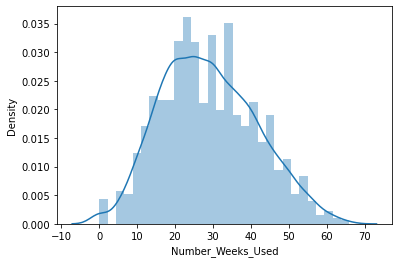

In [44]:
sns.distplot(ds["Number_Weeks_Used"])
plt.show()

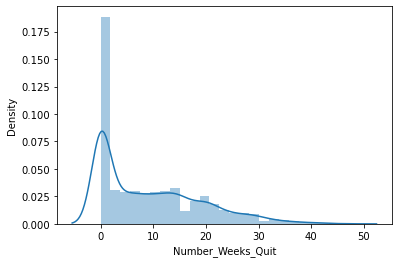

In [45]:
sns.distplot(ds["Number_Weeks_Quit"])
plt.show()

#univariate analysis suggests that data is positively skewed. not normalized

In [46]:
#bivariate analysis

In [47]:
ds.Crop_Damage.unique() # checking the target variable

array([0, 1, 2])

Text(0.5, 1.0, 'Number_Weeks_Used for Damaged by other reasons-1 \n')

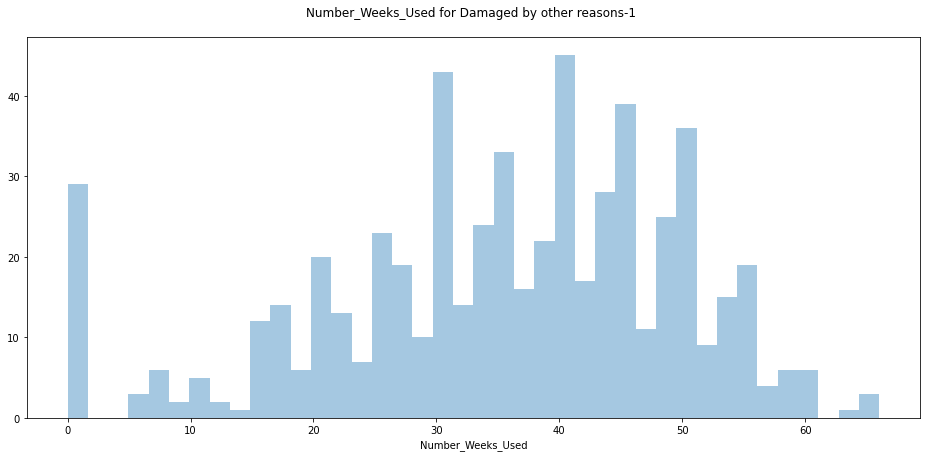

In [48]:
plt.figure(figsize=(16,7))
sns.distplot(ds[ds['Crop_Damage']==1]['Number_Weeks_Used'],kde=False,bins=40)
plt.title('Number_Weeks_Used for Damaged by other reasons-1 \n')

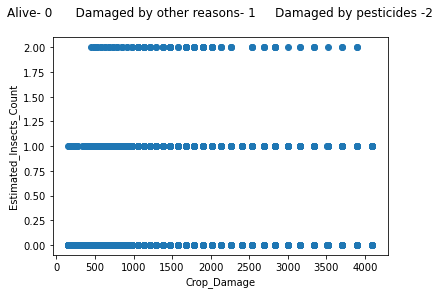

In [49]:
plt.scatter(ds["Estimated_Insects_Count"],ds["Crop_Damage"])
plt.title('Alive- 0      Damaged by other reasons- 1     Damaged by pesticides -2\n')
plt.xlabel("Crop_Damage")
plt.ylabel("Estimated_Insects_Count")
plt.show()

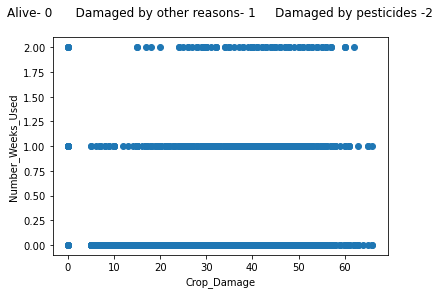

In [50]:
plt.scatter(ds["Number_Weeks_Used"],ds["Crop_Damage"])
plt.title('Alive- 0      Damaged by other reasons- 1     Damaged by pesticides -2\n')
plt.xlabel("Crop_Damage")
plt.ylabel("Number_Weeks_Used")
plt.show()

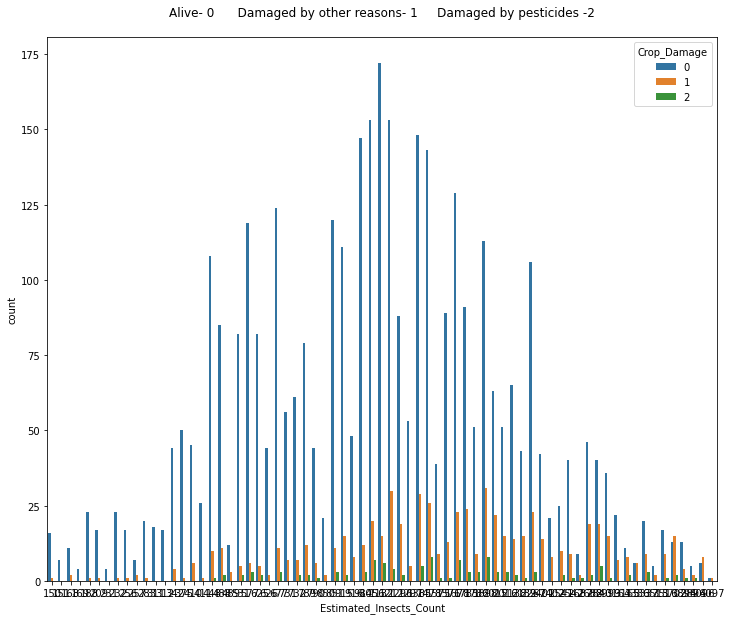

In [51]:
plt.figure(figsize=(12,10))
sns.countplot(x ='Estimated_Insects_Count',hue='Crop_Damage', data = ds)
plt.title('Alive- 0      Damaged by other reasons- 1     Damaged by pesticides -2\n')
plt.show()

Text(0.5, 1.0, 'Pesticide_Use_Category for Damaged by pesticides-2 \n')

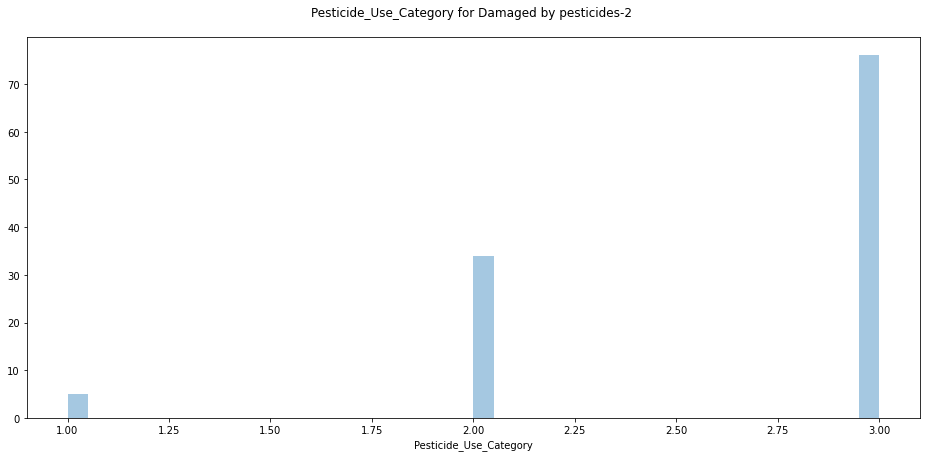

In [52]:
plt.figure(figsize=(16,7))
sns.distplot(ds[ds['Crop_Damage']==2]['Pesticide_Use_Category'],kde=False,bins=40)
plt.title('Pesticide_Use_Category for Damaged by pesticides-2 \n')

# Handling the null values
only this ccolumn has null values which is numerical . so changing the null with mean()

In [53]:
ds['Number_Weeks_Used'] = ds['Number_Weeks_Used'].fillna((ds['Number_Weeks_Used'].mean()))

In [54]:
# changing the nominal value to integer for training model
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ds["ID"]=le.fit_transform(ds["ID"])

# Handling the outliers¶

<AxesSubplot:>

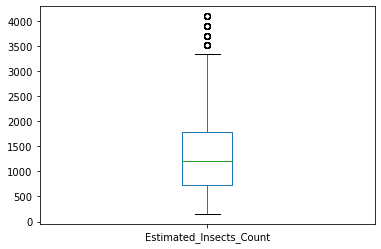

In [55]:
ds["Estimated_Insects_Count"].plot.box()

<AxesSubplot:>

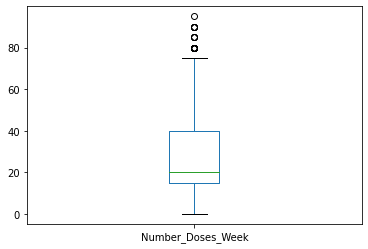

In [56]:
ds["Number_Doses_Week"].plot.box()

<AxesSubplot:>

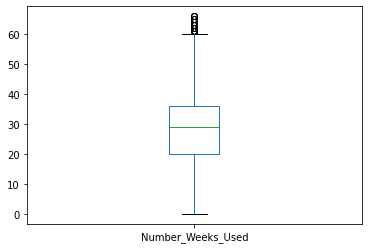

In [57]:
ds["Number_Weeks_Used"].plot.box()

In [58]:
collist=ds.columns.values
ncol=12
nrows=10

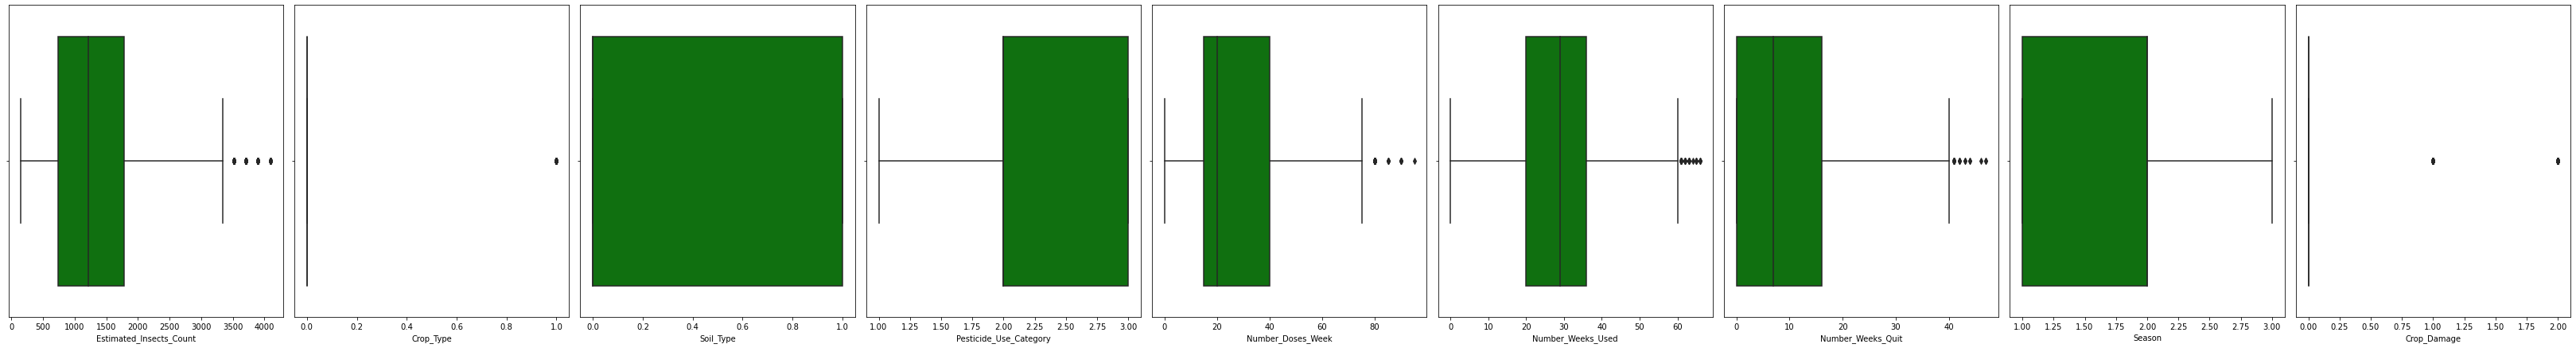

In [59]:
plt.figure(figsize=(5*ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(ds[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [60]:
from scipy.stats import zscore

In [61]:
z=np.abs(zscore(ds))
z

array([[1.73167423, 1.44286807, 1.85681868, ..., 0.94782668, 1.28702725,
        0.42765624],
       [1.730921  , 1.41708065, 1.85681868, ..., 0.94782668, 0.15207762,
        1.77233374],
       [1.73016778, 1.35813798, 1.85681868, ..., 0.94782668, 0.15207762,
        1.77233374],
       ...,
       [1.73016778, 1.11008649, 0.53855555, ..., 1.83218282, 0.15207762,
        0.42765624],
       [1.730921  , 1.11008649, 0.53855555, ..., 1.52329287, 0.15207762,
        0.42765624],
       [1.73167423, 1.11008649, 0.53855555, ..., 0.80254967, 0.15207762,
        0.42765624]])

In [62]:
threshold=3
print(np.where(z>3))

(array([   7,    9,   14,   22,   23,  100,  103,  112,  149,  165,  166,
        167,  179,  185,  186,  197,  207,  222,  223,  242,  248,  252,
        264,  265,  290,  296,  305,  316,  325,  346,  351,  355,  361,
        374,  375,  377,  384,  453,  458,  466,  480,  510,  517,  522,
        557,  595,  612,  634,  693,  702,  703,  704,  705,  706,  807,
        819,  855,  856,  911,  944,  978,  980,  998, 1017, 1019, 1067,
       1097, 1178, 1212, 1291, 1307, 1324, 1326, 1327, 1329, 1337, 1339,
       1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1347, 1348, 1349,
       1406, 1443, 1457, 1489, 1523, 1589, 1652, 1654, 1737, 1807, 1868,
       2019, 2043, 2090, 2136, 2139, 2140, 2165, 2170, 2171, 2174, 2183,
       2185, 2188, 2190, 2190, 2191, 2192, 2193, 2194, 2237, 2392, 2553,
       2565, 2585, 2589, 2590, 2590, 2591, 2615, 2663, 2671, 2696, 2702,
       2710, 2714, 2716, 2723, 2767, 2779, 2792, 2796, 2797, 2804, 2806,
       2814, 2828, 2829, 2834, 2841, 2842, 2851, 2

In [63]:
ds_new=ds[(z<3).all(axis=1)]
ds_new.shape,ds.shape

((4370, 10), (4599, 10))

In [64]:
ds_new.skew()

ID                         0.002956
Estimated_Insects_Count    0.789806
Crop_Type                  1.308548
Soil_Type                  0.079724
Pesticide_Use_Category     0.753578
Number_Doses_Week          0.711083
Number_Weeks_Used          0.275330
Number_Weeks_Quit          0.813382
Season                     0.141605
Crop_Damage                2.003206
dtype: float64

little skewness is there so we will remove it

In [65]:
ds_x=ds_new.drop(columns=['Crop_Damage'])
y_t=pd.DataFrame(ds_new['Crop_Damage'])
print(ds_x.shape, y_t.shape)

(4370, 9) (4370, 1)


In [66]:
from sklearn.preprocessing import power_transform

In [67]:
ds_x=power_transform(ds_x,method='yeo-johnson')

In [68]:
#y=ds_new.iloc[:,-1]
#y.shape

#scaling the dataset

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
#scaling the dataset
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
scaledX=sc.fit_transform(ds_x)
scaledX.shape

(4370, 9)

In [71]:
# finding the best random state

In [72]:
# importing our model libraries
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [73]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [74]:
best_rstate=0
accuracy=0
for i in range(30,200):
    x_train,x_test,y_train,y_test=train_test_split(scaledX,y_t,test_size=.22,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    predlr=mod.predict(x_test)
    tempaccu=accuracy_score(y_test,predlr)
    if(tempaccu>accuracy):
        accuracy=tempaccu
        best_rstate=i
        
print("Best Accuracy",accuracy*100, "Random state",best_rstate)        

Best Accuracy 87.31808731808732 Random state 66


In [75]:
#using the best random state

In [76]:
x_train,x_test,y_train,y_test=train_test_split(scaledX,y_t,test_size=.22,random_state=66)

In [77]:
x_train.shape

(3408, 9)

In [78]:
x_test.shape

(962, 9)

In [79]:
y_train.shape

(3408, 1)

In [80]:
y_test.shape

(962, 1)

# Finding the best model


In [81]:
#using algorithms in for loops
model=[LogisticRegression(),MultinomialNB(),DecisionTreeClassifier(),RandomForestClassifier(),KNeighborsClassifier(),SVC()]
for m in model:
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    print("Accuracy score of " , m , "is " , accuracy_score(y_test,y_pred))
    print("confusion matrix of " , m , "is \n",confusion_matrix(y_test,y_pred))
    print("classification report of " , m, "is \n",classification_report(y_test,y_pred))
    print("**********************************************************************\n")

Accuracy score of  LogisticRegression() is  0.8731808731808732
confusion matrix of  LogisticRegression() is 
 [[833   4]
 [118   7]]
classification report of  LogisticRegression() is 
               precision    recall  f1-score   support

           0       0.88      1.00      0.93       837
           1       0.64      0.06      0.10       125

    accuracy                           0.87       962
   macro avg       0.76      0.53      0.52       962
weighted avg       0.84      0.87      0.82       962

**********************************************************************

Accuracy score of  MultinomialNB() is  0.8700623700623701
confusion matrix of  MultinomialNB() is 
 [[837   0]
 [125   0]]
classification report of  MultinomialNB() is 
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       837
           1       0.00      0.00      0.00       125

    accuracy                           0.87       962
   macro avg       0.44     

# Conclusion

LogisticRegression is performing best among all above with accuaracy score .87

# hyper parameter tuning

In [82]:
# GradientBoostingRegressor is best performing model so finding its best parameter
from sklearn.model_selection import GridSearchCV

In [83]:
grid={"C":[1,10], "penalty":["l1","l2"]}# l1 lasso l2 ridge
lr=LogisticRegression()
clf=GridSearchCV(lr,grid,cv=10)
clf.fit(x_train,y_train)

print("best parameters ",clf.best_params_)
print("accuracy :",clf.best_score_)

best parameters  {'C': 10, 'penalty': 'l2'}
accuracy : 0.845363981369674


In [84]:
# Logistic Reression with best parameters 
lr=LogisticRegression(C=10,penalty='l2',random_state=66)
lr.fit(x_train,y_train)
lr.score=(x_train,y_train)
predlr=lr.predict(x_test)
print("accuracy score",accuracy_score(y_test,predlr))
print("confusion matrix\n",confusion_matrix(y_test,predlr))
print("classification report",classification_report(y_test,predlr))

accuracy score 0.8690228690228691
confusion matrix
 [[828   9]
 [117   8]]
classification report               precision    recall  f1-score   support

           0       0.88      0.99      0.93       837
           1       0.47      0.06      0.11       125

    accuracy                           0.87       962
   macro avg       0.67      0.53      0.52       962
weighted avg       0.82      0.87      0.82       962



In [85]:
# cross validating Logistic Regression
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,scaledX,y_t,cv=10,scoring='accuracy')
print("Cross Validation Score : ", score,"\n")
print("Mean" , score.mean())
print("Standard Deviation" , score.std())

Cross Validation Score :  [0.69336384 0.84439359 0.83981693 0.85354691 0.85354691 0.85354691
 0.76201373 0.8604119  0.85125858 0.85354691] 

Mean 0.8265446224256292
Standard Deviation 0.052029186237518774


# Saving the model- Serialization

In [86]:
# saving the prediction model

import pickle
filename="Agriculture.pkl"
pickle.dump(lr,open(filename,'wb'))

In [87]:
# load the model
fitted_model=pickle.load(open("Agriculture.pkl",'rb'))

In [88]:
fitted_model

LogisticRegression(C=10, random_state=66)

In [89]:
# predictions over test data (test_agriculture.csv)
predictions=fitted_model.predict(scaled_df)

In [90]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [91]:
ds_pred=pd.DataFrame(predictions)